# Sentiment Analysis on Customer Feedback Data

### Here we will apply some bag-of-words techniqes to caculate sentiment of the feedback text. We are going to try out the following two  algoriths and compare their performaces:

* nltk-vader
* textblob

### With the help of this project, we will try to answer the folliowing questions:

1. Which model works better, nltk or textblob?

2. What is the advantage with bag of words approach?

3. When is bag of words not a good option?

## Data loading & exploration

We will be using a mobile product feedback dataset. It can be found here : https://www.kaggle.com/parve05/customer-review-dataset#redmi6.csv


In [1]:
#Loading the required libraries
import pandas as pd
import numpy as np


In [2]:
import chardet    
rawdata = open("redmi6.csv", 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1252


In [3]:
full_data = pd.read_csv("redmi6.csv",encoding='Windows-1252')
full_data.head()

,Review Title,Customer name,Rating,Date,Category,Comments,Useful
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful


Lets see if there are any null values in our dataset.

In [4]:
full_data.isnull()

,Review Title,Customer name,Rating,Date,Category,Comments,Useful
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
275,False,False,False,False,False,False,True
276,False,False,False,False,False,False,True
277,False,False,False,False,False,False,True
278,False,False,False,False,False,False,True


No null values in our dataset, we're good to go!

For this project, we will focus on two columns : Review Title & Rating

In [5]:
data = full_data[["Review Title", "Rating"]]
data.head()

,Review Title,Rating
0,Another Midrange killer Smartphone by Xiaomi,4.0 out of 5 stars
1,vry small size mobile,3.0 out of 5 stars
2,Full display not working in all application.,3.0 out of 5 stars
3,Value for Money,5.0 out of 5 stars
4,Not worth for the money,2.0 out of 5 stars


We need to extract the rating from the "Rating" text & convert it to float

In [6]:
def get_rating(row):
    '''
    This function extracts ratings from the text and converts into float
    '''
    return float(row["Rating"].split()[0])

data["Rating"] = data.apply(get_rating, axis = 1)
data.head()

C:\Users\Sachin Sharma\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Review Title,Rating
0,Another Midrange killer Smartphone by Xiaomi,4.0
1,vry small size mobile,3.0
2,Full display not working in all application.,3.0
3,Value for Money,5.0
4,Not worth for the money,2.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002293731BE88>]],
      dtype=object)

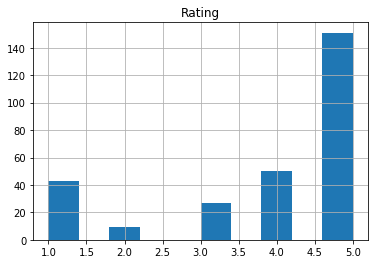

In [7]:
data.hist()

Next, we will convert ratings into categories
* Rating < 3 : Negative
* Rating = 3 : Neutral
* Rating >3  : Positive

In [8]:
def convert_rating(row):
    '''
    This function converts the numerical rating
    into predefined categories : Postive, Neutral, Negative    
    
    '''
    
    rating = row["Rating"]
    if rating > 3:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

data["Rating_Category"] = data.apply(convert_rating, axis = 1)
data.head()

C:\Users\Sachin Sharma\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Review Title,Rating,Rating_Category
0,Another Midrange killer Smartphone by Xiaomi,4.0,Positive
1,vry small size mobile,3.0,Neutral
2,Full display not working in all application.,3.0,Neutral
3,Value for Money,5.0,Positive
4,Not worth for the money,2.0,Negative


## Testing NLTK-Vader

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def get_nltk_sentiment(row):
    '''
    This function accepts a text and apply nltk sentiment analysis 
    to return a sentiment label for the text
    
    '''
    
    nltk_score = sia.polarity_scores(row["Review Title"])["compound"]
    if nltk_score > 0.25:
        return "Positive"
    elif nltk_score > -0.25:
        return "Neutral"
    else:
        return "Negative"
    
data["nltk_pred"] = data.apply(get_nltk_sentiment, axis = 1)
data.head()
    

C:\Users\Sachin Sharma\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Review Title,Rating,Rating_Category,nltk_pred
0,Another Midrange killer Smartphone by Xiaomi,4.0,Positive,Negative
1,vry small size mobile,3.0,Neutral,Neutral
2,Full display not working in all application.,3.0,Neutral,Neutral
3,Value for Money,5.0,Positive,Positive
4,Not worth for the money,2.0,Negative,Neutral


## Testing TextBlob

In [10]:
from textblob import TextBlob

def get_textb_sentiment(row):
    '''
    This function accepts a text and apply textblob sentiment analysis 
    to return a sentiment label for the text
    
    '''
    
    textb_score = TextBlob(row["Review Title"]).sentiment.polarity
    if textb_score > 0.25:
        return "Positive"
    elif textb_score > -0.25:
        return "Neutral"
    else:
        return "Negative"
    
data["textblob_pred"] = data.apply(get_textb_sentiment, axis = 1)
data.head()
    

C:\Users\Sachin Sharma\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Review Title,Rating,Rating_Category,nltk_pred,textblob_pred
0,Another Midrange killer Smartphone by Xiaomi,4.0,Positive,Negative,Neutral
1,vry small size mobile,3.0,Neutral,Neutral,Negative
2,Full display not working in all application.,3.0,Neutral,Neutral,Positive
3,Value for Money,5.0,Positive,Positive,Neutral
4,Not worth for the money,2.0,Negative,Neutral,Neutral


## Comparison

In [11]:
from sklearn.metrics import *

### NLTK

In [12]:
print("Accuracy for NLTK is ",accuracy_score(data["Rating_Category"], data["nltk_pred"])*100,"%")

Accuracy for NLTK is  69.28571428571428 %


In [13]:
confusion_matrix(data["Rating_Category"], data["nltk_pred"])

array([[ 28,  21,   3],
       [  3,  15,   9],
       [  3,  47, 151]], dtype=int64)

### TEXTBLOB

In [14]:
print("Accuracy for TEXTBLOB is ",accuracy_score(data["Rating_Category"], data["textblob_pred"])*100,"%")

Accuracy for TEXTBLOB is  60.0 %


In [15]:
confusion_matrix(data["Rating_Category"], data["textblob_pred"])

array([[ 17,  33,   2],
       [  4,  12,  11],
       [  1,  61, 139]], dtype=int64)

## Analysis of the results

**Which model works better, nltk or textblob?**

Accuracy achieved by NLTK is around 70 percent and accuracy achieved by Textblob is 60 percent. Clearly, nltk has out performed textblob by a good margin. **However, this cannot be generalized for all domains or datasets. You may find the results varying as per the data or domain you have chosen. You can tweak this code a little to suit your use-case :)**

**What is the advantage with bag of words approach?**

Sentiment Analysis suffers from lack of availability of labelled dataset. Labelling data is a tiresome and expensive process and such datasets may not be available for many domains. Bag of words is a very simple approach which can be used for sentiment analysis when getting labelled dataset is not a viable option.

**When is bag of words not a good option?**

Bag of words may not be a good option for certain domains. For example, let us test few examples from financial domain:


In [16]:
from sentiment import get_sentiment
text = "I want to know the current price of the share"
get_sentiment(text, algo="nltk")

0.3612

In [17]:
text = "We want to discuss about the new bond issue"
get_sentiment(text, algo="textblob")

0.13636363636363635

So, we notice that although both the sentences are neutral in financial sense but out algorithms, both nltk and vader, think they carry some sentiment. Hence, bag-of-words may not work from some domains like Finance, Medical etc.